You can download dataset from https://www.microsoft.com/en-us/download/details.aspx?id=54765&e6b34bbe-475b-1abd-2c51-b5034bcdd6d2=True

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import tqdm
import random
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import load_img

# Reading Data and Filtering Unwanted files

In [3]:
DIRECTORY = r'E:\Omar CS\Datasets\PetImages'
input_path = []
label = []

for class_name in os.listdir(DIRECTORY):
    for path in os.listdir(DIRECTORY+'/'+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join(DIRECTORY+'/', class_name, path))
print(input_path[0], label[0])


E:\Omar CS\Datasets\PetImages/Cat\0.jpg 0


In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0    PetImages/Dog/67.jpg      1
1  PetImages/Dog/8273.jpg      1
2  PetImages/Dog/9117.jpg      1
3   PetImages/Cat/654.jpg      0
4  PetImages/Cat/6418.jpg      0

Dog : 1 , Cat : 0

In [4]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
# shuffle data
df = df.sample(frac=1).reset_index(drop=True)
df

images  label
0       E:\Omar CS\Datasets\PetImages/Dog\195.jpg      1
1       E:\Omar CS\Datasets\PetImages/Cat\243.jpg      0
2      E:\Omar CS\Datasets\PetImages/Cat\6386.jpg      0
3      E:\Omar CS\Datasets\PetImages/Dog\2805.jpg      1
4      E:\Omar CS\Datasets\PetImages/Cat\4824.jpg      0
...                                           ...    ...
24997  E:\Omar CS\Datasets\PetImages/Dog\9111.jpg      1
24998   E:\Omar CS\Datasets\PetImages/Cat\280.jpg      0
24999  E:\Omar CS\Datasets\PetImages/Cat\9198.jpg      0
25000  E:\Omar CS\Datasets\PetImages/Cat\9214.jpg      0
25001  E:\Omar CS\Datasets\PetImages/Dog\7592.jpg      1

[25002 rows x 2 columns]

In [5]:
import PIL
for i in df['images']:
    if '.jpg' not in i:
        print(i)

l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
print(l)

E:\Omar CS\Datasets\PetImages/Dog\Thumbs.db
E:\Omar CS\Datasets\PetImages/Cat\Thumbs.db
['E:\\Omar CS\\Datasets\\PetImages/Dog\\Thumbs.db', 'E:\\Omar CS\\Datasets\\PetImages/Dog\\11702.jpg', 'E:\\Omar CS\\Datasets\\PetImages/Cat\\666.jpg', 'E:\\Omar CS\\Datasets\\PetImages/Cat\\Thumbs.db']


In [6]:
# delete db files
df.drop(df[df['images'] == r'E:\Omar CS\Datasets\PetImages/Dog\Thumbs.db'].index, inplace=True)
df.drop(df[df['images'] == r'E:\Omar CS\Datasets\PetImages/Cat\Thumbs.db'].index, inplace=True)
print(len(df))

25000


In [7]:
# delete 666 and 11702
df.drop(df[df['images'] == r'E:\Omar CS\Datasets\PetImages/Cat\666.jpg'].index, inplace=True)
df.drop(df[df['images'] == r'E:\Omar CS\Datasets\PetImages/Cat\11702.jpg'].index, inplace=True)
len(df)

24998

# EDA

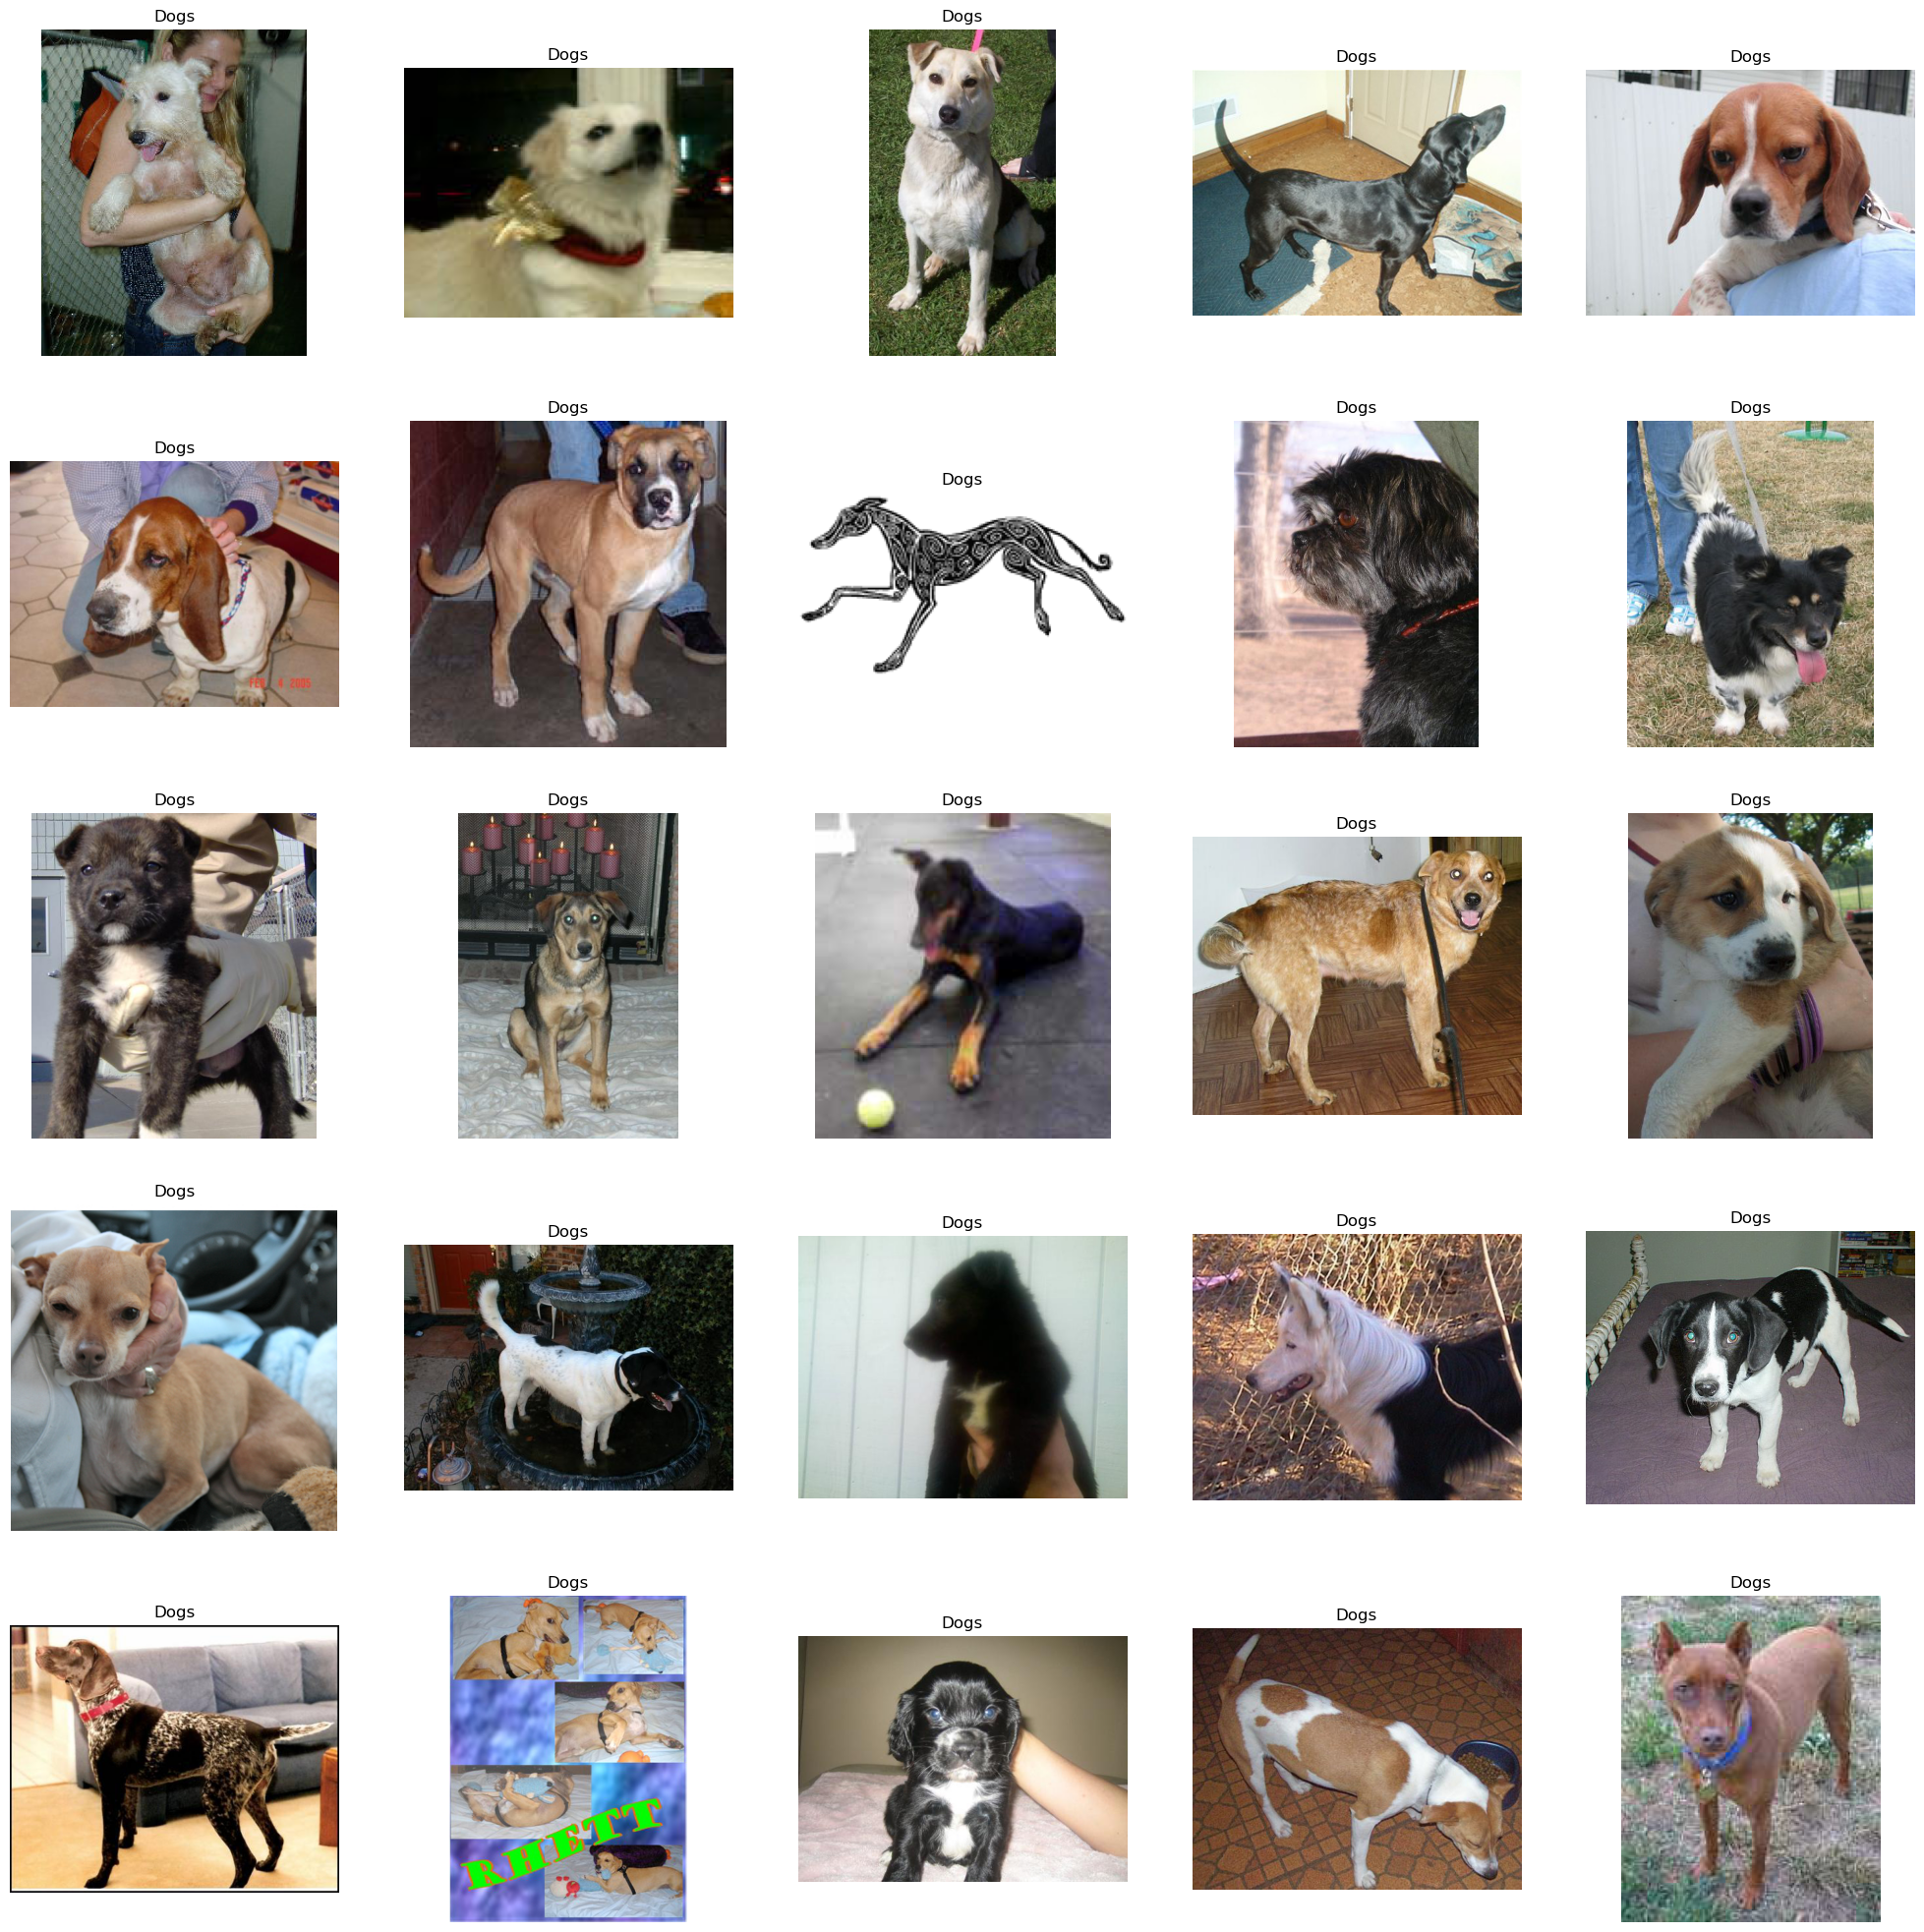

In [8]:
# to display dog images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

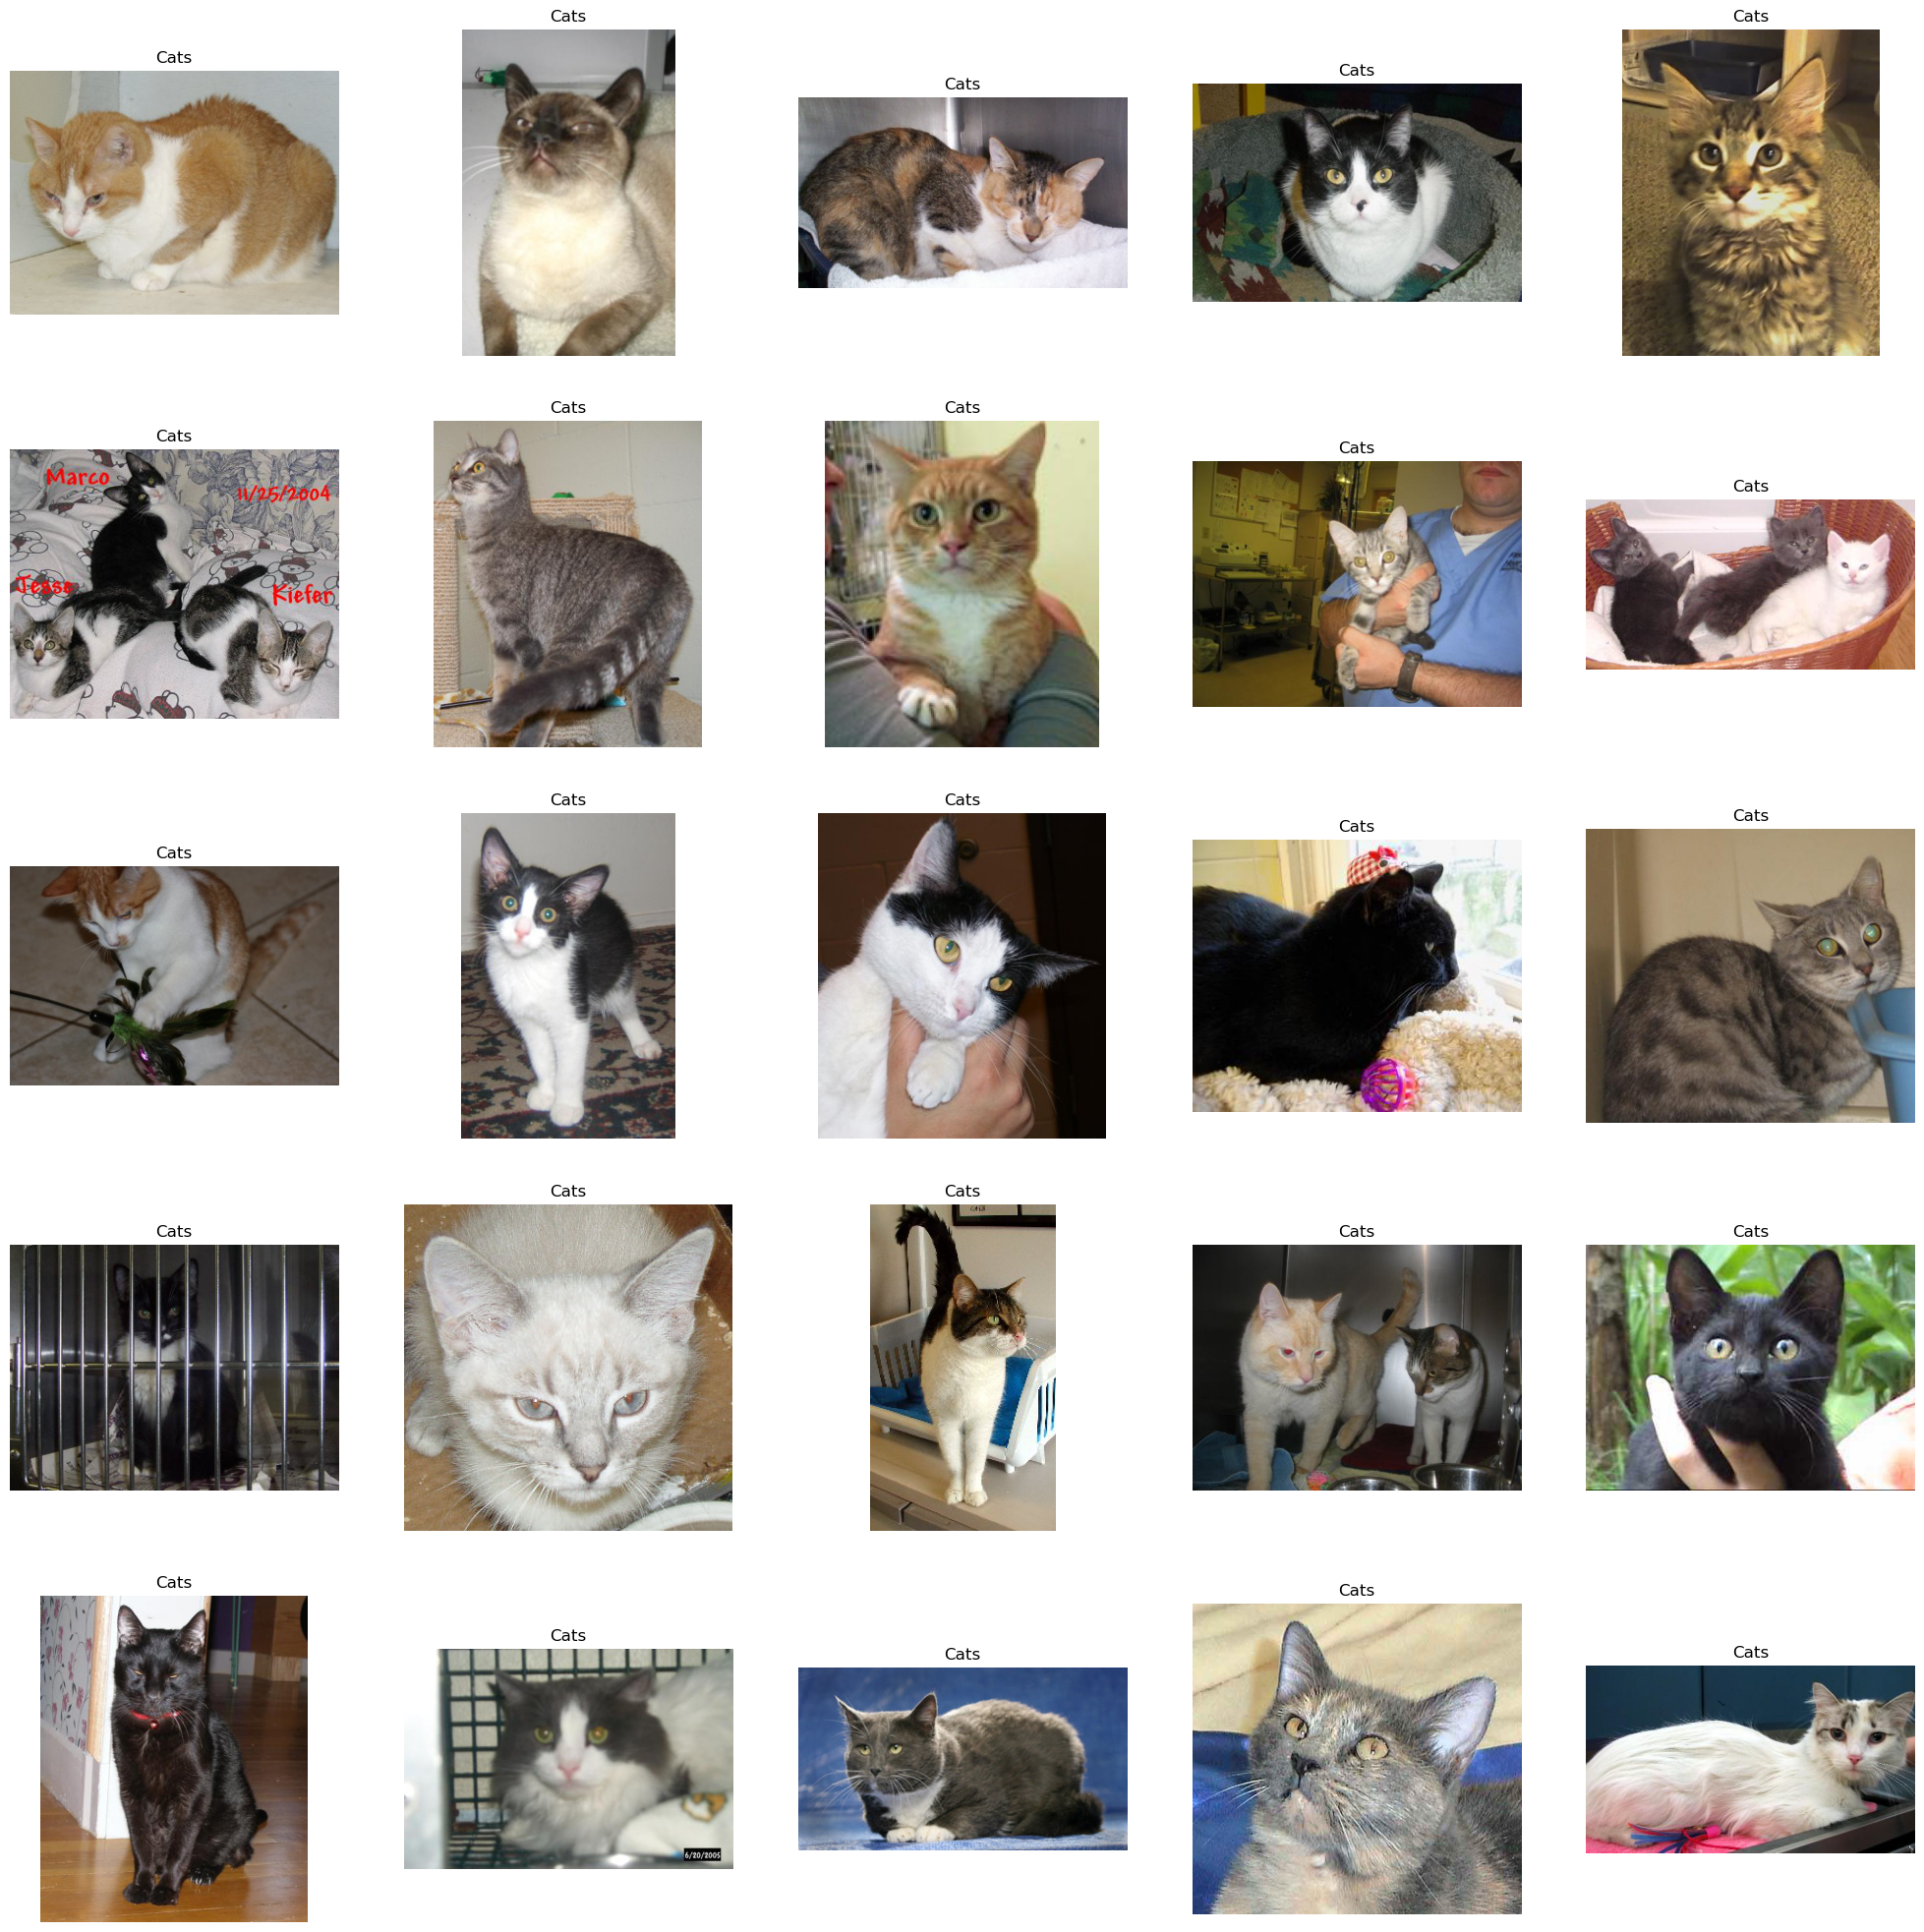

In [9]:
# to display cat images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

In [10]:
catcount=0
dogcount=0
for i in df.label :
    if i == 1 :
        dogcount+=1
    else :
        catcount +=1
print(dogcount)
print(catcount)

12500
12498


Text(0.5, 1.0, 'Cats vs dog count')

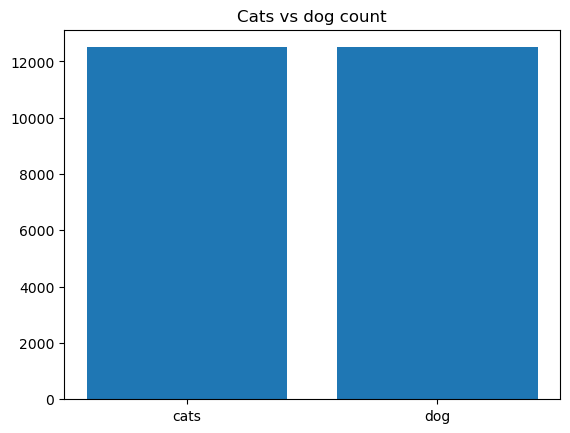

In [12]:
plt.bar(['cats','dog'], [catcount,dogcount])
plt.title('Cats vs dog count')

# Splitting data

In [13]:
df.label = df.label.astype('str')

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=1)

In [16]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # Normalization
    rotation_range = 40, # Data Augmentation to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


# Building CNN Model

In [17]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [19]:
# Initialising the CNN
model = Sequential([
    # Convolution
Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'),
    # Pooling
MaxPooling2D((2, 2)),
    # Adding a second convolutional layer
Conv2D(64, (3, 3), activation = 'relu'),
    # Second pooling
MaxPooling2D(pool_size = (2, 2)),
# Flattening to enter the neural network
Flatten(),
    # Full connection
Dense(128, activation = 'relu'),
Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)            

In [ ]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 150s 4s/step - loss: 0.8679 - accuracy: 0.5187 - val_loss: 0.6399 - val_accuracy: 0.6238
Epoch 2/10
40/40 [==============================] - 147s 4s/step - loss: 0.6280 - accuracy: 0.6416 - val_loss: 0.5672 - val_accuracy: 0.7024
Epoch 3/10
40/40 [==============================] - 146s 4s/step - loss: 0.5737 - accuracy: 0.6980 - val_loss: 0.5493 - val_accuracy: 0.7148
Epoch 4/10
40/40 [==============================] - 146s 4s/step - loss: 0.5478 - accuracy: 0.7221 - val_loss: 0.5351 - val_accuracy: 0.7356
Epoch 5/10
40/40 [==============================] - 145s 4s/step - loss: 0.5276 - accuracy: 0.7338 - val_loss: 0.5104 - val_accuracy: 0.7494
Epoch 6/10
40/40 [==============================] - 144s 4s/step - loss: 0.5127 - accuracy: 0.7405 - val_loss: 0.4853 - val_accuracy: 0.7664
Epoch 7/10
40/40 [==============================] - 144s 4s/step - loss: 0.5059 - accuracy: 0.7544 - val_loss: 0.4586 - val_accuracy: 0.7868
Epoch 8/10
40

## Test with Real Image

In [ ]:
image_path = "test.jpg" # path of the image
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 128, 128, 3) # reshape for prediction
pred = model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)